packages installed for assignment: pyarrow, fastparquet

# Empirical Problem - Estimating Agglomeration
**Kyle Hood (JHU)**  
**Fall, 2025**  

This problem explores the results reported by Ahlfeldt et al. in Sections 5.2 and 5.3.

---

## Setup
The data used in this problem are available in the file `berlin_36_86.parquet`. This file contains the data frame that we will be working with.

### Variables in the Data Frame
- **block_id**: An ID variable for each block  
- **area_id**: An ID variable for each district  
- **dummywest**: A dummy variable indicating West Berlin (1) or East Berlin (0)  
- **d_wall**: The distance to the inner Berlin Wall (in km)  
- **d_outb**: The distance to the outer wall separating West Berlin from the rest of East Germany (in km)  
- **d_cbd**: The distance to the central business district  
- **floor_1936**: The relative price of floor space in 1936  
- **floor_1986**: The relative price of floor space in 1986  
- **emp_wpl_1936**: Workplace employment in 1936  
- **emp_wpl_1986**: Workplace employment in 1986  
- **emp_rsd_1936**: Residents employment in 1936  
- **emp_rsd_1986**: Residents employment in 1986  

### Notes
- Several questions focus on West Berlin data. You can subset the data using Python's `pandas` library.
- Growth in a price or quantity is typically expressed as a **log difference**:
  - **Correct**: \( \Delta \log x_t = \log x_t - \log x_{t-1} \)
  - **Incorrect**: \( \Delta \log x_t \neq \log(x_t - x_{t-1}) \)
- When computing growth rates, omit observations where the value in one of the years is zero.

---

## Question 1: Understanding the Data [2 points]
### 1a: Focus on West Berlin data  
- Did the price of floor space become more or less dispersed between 1936 and 1986 in West Berlin?  
- What led you to this conclusion?

### 1b: Compare East and West Berlin  
- On average, was East or West Berlin more densely populated in 1936?  
- What led you to this conclusion?  
  *Note*: Assume all blocks are of equal area, and the employment-to-population ratio is the same for each block.

### 1c: Plots  
- Using Python's `matplotlib` or `seaborn` libraries, plot the log difference in the price of floor space and the difference in workplace employment between 1936 and 1986 in West Berlin against the distance from the inner Berlin Wall.  
  - Distance to the wall should be on the horizontal axis.  
  - Submit these plots with the problem set.  
- Are there relationships between the pairs of variables that each plot represents?

---
## Question 1 Answers:
### 1a:
- The price of floor space became less dispersed in West Berlin between 1936 and 1986.
Relative floor space is measured as the ratio of price to floor area. While the mean price per unit of floor space declined modestly from 1.095 in 1936 to 1.009 in 1986, the key evidence comes from changes in dispersion.
- The standard deviation fell substantially, from 0.339 to 0.138, indicating a large compression in the distribution of prices per unit of floor space. This reduction in dispersion is also visible in the interquartile range and the maximum values, both of which narrowed over time.
- These statistics indicate that not only did average prices per unit of floor space decline slightly, but prices also became far more uniform across properties by 1986.

### 1b:
- On average, West Berlin was more densely populated in 1936.
- With both a higher average price of floor space and more residential employment in 1936 than East Berlin.

### 1c:
- There are clear relationships between the pairs of variables:
    - Log floor price changes decline as distance to the Wall decreases; prices fell more sharply near the Wall.
    - Employment changes also show steeper declines closer to the Wall.
---

## Question 2: Estimation [4 points]
This question is based on Section 5.2 of Ahlfeldt et al. All calculations are done only with West Berlin data.

### 2a: Regressions  
1. **Regression 1**:  
   - Regress log differences in floor prices (1936–1986) on distance from CBD.
   - Δlog(floor price)=β⋅d_cbd+ε
   - Answer the following:
     - What is the estimated slope coefficient?  0.0378
     - How is this coefficient interpreted?
         - A 1 km increase in distance from the pre-war CBD is associated with a 3.78% higher growth (or smaller decline) in floor prices between 1936 and 1986.
     - Why is it important to look at (log) differences in prices rather than price levels or log-levels?
        Focuses on changes over time, not static spatial sorting
        Removes time-invariant block-level heterogeneity
        Allows coefficients to be interpreted as percentage changes
       
2. **Regression 2**:  
   - Regress the log difference in floor price on distance from CBD and a dummy variable for each district.  
   - Δlog(floor price)=β⋅d_cbd+districtFE+ε
      *Hint*: Use Python's `statsmodels` library to create dummies:  
     - What happened to the coefficient on distance from CBD compared to Regression 1?  
     - What is the interpretation of the difference in coefficients?
    
3. **Regression 3**:  
   - Regress the log difference in floor price on distance from CBD, a dummy variable for each district, and the distance from the inner and outer walls.  
     - What happened to the coefficient on distance from CBD compared to Regression 2?  
     - Why would the researcher wish to add distance from inner and outer walls to the regression?

4. **Regression 4**:  
   - Compute an indicator variable for the six grid cells as defined in the paper.  
   - Repeat the regressions in Regression 1 and Regression 3, replacing distance from CBD with the six-grid-cell indicator.  
     *Hint*: Use Python's `pandas` library or create six separate variables.  
     - Can you see a pattern of lower prices near the pre-war CBD in the indicator variable coefficients?  
     - Did this pattern change much when you added the additional covariates?  
     - Is there a good reason to use the grid cell version instead of the linear specification?

---

## Question 3: Comparison to Paper [2 points]
1. How do the regression specifications you ran differ from the regressions in columns (1) to (3) of Table 1 in the paper?  
2. Why did the authors estimate the regressions how they did?  
   - Compare columns (1) and (3) of Table 1 using the plot from Question 1.  
3. Consider land prices in the first grid cell from the Berlin Wall (0.75 km from the wall).  
   - What is the prediction of the model in the paper (using column (1)) on the percent change in land prices?  
     *Hint*: Look for the answer in the paper.

# Preliminaries: Set Working Directory and Load Data
Use `os` to set the working directory and `pandas` to load the data from a `.parquet` file equivalent to the RData file.

## Instructions:
1. Set the working directory to the folder containing the `.parquet` file.
2. Load the `.parquet` file using `pandas`.
3. Display the first few rows of the dataset using `.head()`.

In [1]:
# Import necessary libraries
#your code here
import pandas as pd
import os
from pathlib import Path
# Set the working directory
working_dir = Path("C:/Users/nicho/Documents/JHU/Urban Economics/week2")
#your code here
os.chdir(working_dir)
date_file_path = working_dir / "berlin_36_86.parquet"
# Load the data (.parquet format)
berlin_df = pd.read_parquet(date_file_path)

print("Data loaded successfully.")
print(f"'Number of rows': {berlin_df.shape[0]}\n'Number of columns': {berlin_df.shape[1]}")
# Display the first few rows of the dataset
berlin_df.head()

Data loaded successfully.
'Number of rows': 10782
'Number of columns': 12


,block_id,area_id,dummywest,d_wall,d_outb,d_cbd,floor_1936,floor_1986,emp_wpl_1936,emp_wpl_1986,emp_rsd_1936,emp_rsd_1986
0,1001.0,1001000,1,2.446667,9.171771,4.976145,0.940052,0.772863,0.0,15.0,30.0,0.0
1,1005.0,1001000,1,1.113738,9.461269,3.794431,0.980144,0.754665,256.0,497.0,106.0,0.0
2,1006.0,1001000,1,0.810379,9.372357,3.624603,0.980144,0.754665,0.0,15.0,106.0,0.0
3,1007.0,1001000,1,3.013314,9.366148,5.051322,1.217992,0.831672,349.0,1649.0,548.0,239.0
4,1009.0,1001000,1,1.168528,9.711312,3.683481,1.298132,0.754665,791.0,725.0,294.0,34.0


# Question 1a/1b: Summary Statistics
Use `pandas` to calculate summary statistics for subsets of the data based on conditions.

## Instructions:
1. Filter the dataset to include only rows where `dummywest == 1` (West Berlin).
2. Calculate summary statistics for `floor_1936` and `floor_1986` for West Berlin.
3. Filter the dataset to include only rows where `dummywest == 0` (East Berlin).
4. Calculate summary statistics for `emp_rsd_1936` for West Berlin, East Berlin, and the entire dataset.
5. Display the calculated summary statistics for comparison.

In [14]:
stats_columns = ['floor_1936', 'floor_1986', 'emp_rsd_1936', 'emp_rsd_1986']

# Filter data for West Berlin
west_berlin_df = berlin_df[berlin_df['dummywest'] == 1].copy()
print(f"Number of observations in West Berlin: {west_berlin_df.shape[0]}")
# Calculate summary statistics for West Berlin
summary_stats_west = west_berlin_df.describe()
# Display the summary statistics
print("Floor Summary Statistics for West Berlin:")
# summary_stats_west[stats_columns]

#=========================

# Filter data for East Berlin
east_berlin_df = berlin_df[berlin_df['dummywest'] == 0].copy()
print(f"Number of observations in East Berlin: {east_berlin_df.shape[0]}")
# Calculate summary statistics for East Berlin
summary_stats_east = east_berlin_df.describe()
# Display the summary statistics
print("Floor Summary Statistics for East Berlin:")
# summary_stats_east[stats_columns]

#=========================

# Filter data for East Berlin
# Calculate summary statistics for East Berlin
summary_stats_berlin = berlin_df[stats_columns].describe()
# Display the summary statistics
print("Floor Summary Statistics for Berlin:")
# summary_stats_berlin[stats_columns]

#=========================
#merge the summary statistics into one display
# summary_stats = pd.concat([summary_stats_west[stats_columns], summary_stats_east[stats_columns]], axis=1, keys=['West Berlin', 'East Berlin'])
summary = None
stat_pairs = [['floor_1936', 'floor_1986'], ['emp_rsd_1936', 'emp_rsd_1986']]
for column_pair in stat_pairs:
    column_pair_summary = pd.concat([summary_stats_west[stats_columns], summary_stats_east[stats_columns], summary_stats_berlin[stats_columns]], axis=1, keys=['West Berlin', 'East Berlin', 'Berlin'])
    if summary is None:
        summary = column_pair_summary
    else:
        pd.concat([summary, column_pair_summary], axis=0)
        
print("Combined Floor Summary Statistics:")
summary_stats

Number of observations in West Berlin: 6260
Floor Summary Statistics for West Berlin:
Number of observations in East Berlin: 4522
Floor Summary Statistics for East Berlin:
Floor Summary Statistics for Berlin:
Combined Floor Summary Statistics:


West Berlin                                         East Berlin  \
        floor_1936   floor_1986 emp_rsd_1936 emp_rsd_1986   floor_1936   
count  6260.000000  6260.000000  6260.000000  6260.000000  4522.000000   
mean      1.094713     1.009159   162.837380   136.288019     0.994890   
std       0.339040     0.138498   223.130241   160.611076     0.427058   
min       0.613849     0.373501     0.000000     0.000000     0.613849   
25%       0.839612     0.944160    22.000000    35.000000     0.729993   
50%       0.998472     0.993195    68.500000    80.000000     0.868113   
75%       1.298132     1.082599   223.000000   186.000000     1.048132   
max       3.005926     2.051081  4934.000000  2480.000000     3.430145   

                                            
      floor_1986 emp_rsd_1936 emp_rsd_1986  
count        0.0  4522.000000          0.0  
mean         NaN   123.790358          NaN  
std          NaN   223.191598          NaN  
min          NaN     0.000000          NaN  
25%          NaN    15.000000          NaN  
50%          NaN    36.000000          NaN  
75%          NaN   124.000000          NaN  
max          NaN  3371.000000          NaN

# Preliminaries: Calculate Log and Percent Changes
Use `numpy` to calculate log differences and percent changes for specified columns.

## Instructions:
1. Calculate the log difference for `floor_1936` and `floor_1986` for West Berlin.
   - **Note**: The log difference is calculated as \( \log(\text{floor\_1986}) - \log(\text{floor\_1936}) \).
2. Calculate the percent change for `floor_1936` and `floor_1986` for West Berlin.
3. Show how percent change and log change are correlated across blocks using `numpy.corrcoef`.
4. Calculate log differences for `emp_wpl` and `emp_rsd` between 1936 and 1986 for West Berlin.

In [17]:
import numpy as np
# Calculate log difference for floor area
west_berlin_df['log_floor_diff'] = np.log(west_berlin_df['floor_1986']) - np.log(west_berlin_df['floor_1936'])

# Calculate percent change for floor area
west_berlin_df['percent_floor_change'] = ((west_berlin_df['floor_1986'] - west_berlin_df['floor_1936']) / west_berlin_df['floor_1936']) * 100

# Calculate log differences for employment data
#your code here
employment_pairs = [('emp_wpl_1936', 'emp_wpl_1986'), ('emp_rsd_1936', 'emp_rsd_1986')]
for emp_1936, emp_1986 in employment_pairs:
    log_diff_col = f'log_diff_empl_{emp_1936.split("_")[1]}'
    west_berlin_df[log_diff_col] = np.log(west_berlin_df[emp_1986]) - np.log(west_berlin_df[emp_1936])

west_berlin_df = west_berlin_df.replace([np.inf, -np.inf], np.nan)

# Show correlation between percent change and log change of relative floor price
correlation_floor = west_berlin_df['log_floor_diff'].corr(west_berlin_df['percent_floor_change'])
print(f"Correlation between log difference and percent change in floor area (West Berlin): {np.round(correlation_floor, 4)}")
#employment change correlations
correlation_empl = west_berlin_df['log_diff_empl_wpl'].corr(west_berlin_df['log_diff_empl_rsd'])
print(f"Correlation between log differences in workplace and residential employment (West Berlin): {np.round(correlation_empl, 4)}")

west_berlin_df

Correlation between log difference and percent change in floor area (West Berlin): 0.9877
Correlation between log differences in workplace and residential employment (West Berlin): -0.0399


C:\Program Files\ArcGIS\ArcGISPro\bin\Python\envs\arcgispro-py3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Program Files\ArcGIS\ArcGISPro\bin\Python\envs\arcgispro-py3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,block_id,area_id,dummywest,d_wall,d_outb,d_cbd,floor_1936,floor_1986,emp_wpl_1936,emp_wpl_1986,emp_rsd_1936,emp_rsd_1986,wall_band,log_floor_diff,percent_floor_change,log_diff_empl_wpl,log_diff_empl_rsd
0,1001.0,1001000,1,2.446667,9.171771,4.976145,0.940052,0.772863,0.0,15.0,30.0,0.0,Nearest,-0.195834,-17.785136,NaN,NaN
1,1005.0,1001000,1,1.113738,9.461269,3.794431,0.980144,0.754665,256.0,497.0,106.0,0.0,Nearest,-0.261425,-23.004648,0.663413,NaN
2,1006.0,1001000,1,0.810379,9.372357,3.624603,0.980144,0.754665,0.0,15.0,106.0,0.0,Nearest,-0.261425,-23.004648,NaN,NaN
3,1007.0,1001000,1,3.013314,9.366148,5.051322,1.217992,0.831672,349.0,1649.0,548.0,239.0,Near,-0.381520,-31.717730,1.552852,-0.829812
4,1009.0,1001000,1,1.168528,9.711312,3.683481,1.298132,0.754665,791.0,725.0,294.0,34.0,Nearest,-0.542408,-41.865313,-0.087126,-2.157219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,97086.0,12097000,1,3.024665,5.183420,9.288511,0.839612,0.772863,159.0,833.0,34.0,5.0,Near,-0.082838,-7.949955,1.656129,-1.916923
6256,97087.0,12097000,1,2.775235,4.943993,9.309326,0.839612,0.772863,218.0,888.0,32.0,15.0,Near,-0.082838,-7.949955,1.404477,-0.757686
6257,97088.0,12097000,1,2.915033,5.309314,8.971391,0.839612,0.772863,0.0,216.0,21.0,0.0,Near,-0.082838,-7.949955,NaN,NaN
6258,97089.0,12097000,1,2.696056,5.123805,8.972520,0.839612,0.772863,0.0,453.0,21.0,13.0,Near,-0.082838,-7.949955,NaN,-0.479573


# Question 1 part C: Generate Scatter Plots
Use `matplotlib` or `seaborn` to create scatter plots for visualizing relationships between variables.

## Instructions:
1. Create a scatter plot for `d_wall` vs. log change in `floor_1936` and `floor_1986` for West Berlin.
2. Create a scatter plot for `d_wall` vs. log change in `emp_wpl` for West Berlin.
3. Save the scatter plots as `.png` files in the working directory.

Correlation between 'd_wall' and log_floor_diff: 0.318799
Correlation between 'd_wall' and log_diff_empl_wpl: 0.090206


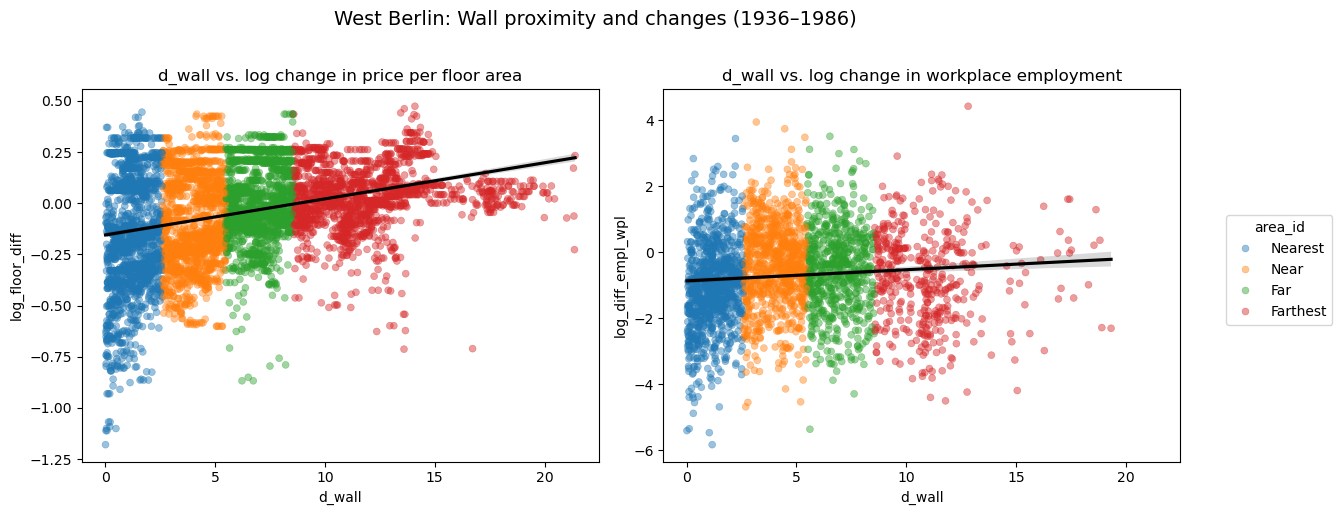

In [23]:
# import any needed libraries for plotting
from matplotlib import pyplot as plt
import seaborn as sns
#your code here
# Create distance bands based on quartiles of d_wall
west_berlin_df["wall_band"] = pd.qcut(
    west_berlin_df["d_wall"],
    q=4,
    labels=["Nearest", "Near", "Far", "Farthest"]
)


fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1, sharex=True)
plots = [
    ("log_floor_diff", "Log change in price per floor area"),
    ("log_diff_empl_wpl", "Log change in workplace employment"),
]

for ax, (ycol, ylab) in zip(axs, plots):
    # scatter by group
    sns.scatterplot(
        data=west_berlin_df,
        x="d_wall",
        y=ycol,
        ax=ax,
        s=25,
        alpha=0.45,
        edgecolor=None,
        hue="wall_band",
    )
    sns.regplot(
        data=west_berlin_df,
        x="d_wall",
        y=ycol,
        scatter=False,
        ax=ax,
        color="black",
    )
    correlation =  west_berlin_df['d_wall'].corr(west_berlin_df[ycol])
    print(f"Correlation between 'd_wall' and {ycol}: {correlation:4f}")

axs[0].set_title("d_wall vs. log change in price per floor area")
axs[1].set_title("d_wall vs. log change in workplace employment")

# one shared legend for both axes, outside
handles, labels = axs[0].get_legend_handles_labels()
for ax in axs:
    leg = ax.get_legend()
    if leg is not None:
        leg.remove()

fig.legend(handles, labels, title="area_id", loc="center left", bbox_to_anchor=(1.02, 0.5))
fig.suptitle("West Berlin: Wall proximity and changes (1936–1986)", y=1.02, fontsize=14)

plt.tight_layout()
plt.show()

# Question 2: Run Regressions
Use `statsmodels` to perform linear regressions and display summary statistics.

## Instructions:
1. Run a regression of log change in `floor_1936` and `floor_1986` on `d_cbd` for West Berlin.
2. Run a regression of log change in `floor_1936` and `floor_1986` on `d_cbd` and `area_id` for West Berlin.
3. Run a regression of log change in `floor_1936` and `floor_1986` on `d_cbd`, `d_wall`, `d_outb`, and `area_id` for West Berlin.
4. Create a categorical variable `dcell` based on thresholds of `d_cbd` and run regressions using this variable.

In [5]:
# Import statsmodels and patsy for regression analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Ensure all variables used in regressions are numeric and clean the data
def clean_data(df, columns) -> pd.DataFrame:
    """Cast columns as numeric and drop rows with NaN, inf, or -inf.
    
    """
    df_cleaned = df.copy()
    for col in columns:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')  # Cast as numeric
    df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=columns)  # Drop invalid rows
    return df_cleaned

#=========================
# Regression 1: Log change in floor area on d_cbd
columns_r1 = ['log_floor_diff', 'd_cbd']
west_berlin_r1 = clean_data(west_berlin_df, columns_r1)
x_cols, y_col = ['d_cbd'], ['log_floor_diff']
#your code here
smf_1 = smf.ols('log_floor_diff ~ d_cbd', data=west_berlin_r1).fit()
print("\nRegression 1 Results:")
print(smf_1.summary())
print("="*100)

# Regression 2: Log change in floor area on d_cbd and area_id
#your code here
smf_2 = smf.ols('log_floor_diff ~ d_cbd + area_id', data=west_berlin_r1).fit()
print("\nRegression 2 Results:")
print(smf_2.summary())
print("="*100)

# Regression 3: Log change in floor area on d_cbd, d_wall, d_outb, and area_id
#your code here
smf_3 = smf.ols('log_floor_diff ~ d_cbd + d_wall + d_outb + area_id', data=west_berlin_r1).fit()
print("\nRegression 3 Results:")
print(smf_3.summary())
print("="*100)

# Regression 4: Create categorical variable dcell based on distance to CBD thresholds
#your code here
west_berlin_r1['dcell'] = pd.qcut(
    west_berlin_df["d_wall"],
    q=5,
    labels=["Nearest", "Near", "Mid", "Far", "Farthest"]
)

# Regression 4a: Log change in floor area on dcell
#your code here
smf_4a = smf.ols('log_floor_diff ~ dcell', data=west_berlin_r1).fit()
print("\nRegression 4a Results:")
print(smf_4a.summary())
print("="*100)

# Regression 4b: Log change in floor area on dcell, area_id, d_wall, and d_outb
#your code here
smf_4b = smf.ols('log_floor_diff ~ dcell + area_id + d_wall + d_outb', data=west_berlin_r1).fit()
print("\nRegression 4b Results:")
print(smf_4b.summary())
print("="*100)


Regression 1 Results:
                            OLS Regression Results                            
Dep. Variable:         log_floor_diff   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     4993.
Date:                Wed, 28 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:23:01   Log-Likelihood:                 2096.0
No. Observations:                6260   AIC:                            -4188.
Df Residuals:                    6258   BIC:                            -4175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4015      0.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Literal, Iterable, Optional, Union, Dict

def compare_ols_models(
    models,
    model_names: Optional[Iterable[str]] = None,
    comparison_type: Literal['results', 'coefs', 'both'] = 'results',
    coef_terms: Optional[Iterable[str]] = None,
    plot: bool = True,
    figsize=(12, 4),
) -> Union[pd.DataFrame, Dict[str, pd.DataFrame]]:
    """Compare several statsmodels OLS results.

    Parameters
    ----------
    models : list
        List of fitted statsmodels OLS result objects (e.g., from smf.ols(...).fit()).
    model_names : list of str, optional
        Names for each model. If None, generic names (Model 1, Model 2, ...) are used.
    comparison_type : {'results', 'coefs', 'both'}, default 'results'
        - 'results': return overall fit diagnostics (R2, AIC, etc.).
        - 'coefs'  : return coefficient-level diagnostics.
        - 'both'   : return a dict with both tables.
    coef_terms : iterable of str, optional
        Which coefficient names to compare. If None, all non-intercept terms
        appearing in any model are used.
    plot : bool, default True
        If True, create plots for the requested comparison_type.
    figsize : tuple, default (12, 4)
        Figure size for the comparison plots (used for each figure).

    Returns
    -------
    If comparison_type == 'results' :
        pandas.DataFrame with overall diagnostics (nobs, R2, Adj_R2, AIC, BIC, RMSE).
    If comparison_type == 'coefs' :
        pandas.DataFrame with coefficient diagnostics (coef, t, pvalue) by model/term.
    If comparison_type == 'both' :
        dict with keys {'results', 'coefs'} mapping to the two DataFrames above.
    """
    if not models:
        raise ValueError("'models' must be a non-empty list of fitted OLS results.")

    # Validate model names
    n_models = len(models)
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(n_models)]
    else:
        model_names = list(model_names)
        if len(model_names) != n_models:
            raise ValueError("'model_names' must have the same length as 'models'.")

    results_diagnostics = None
    coefs_table = None

    # ---- Overall fit diagnostics ----
    if comparison_type in {'results', 'both'}:
        rows = []
        for name, res in zip(model_names, models):
            rows.append({
                "model": name,
                "nobs": int(res.nobs),
                "R2": res.rsquared,
                "Adj_R2": res.rsquared_adj,
                "AIC": res.aic,
                "BIC": res.bic,
                "RMSE": np.sqrt(res.mse_resid),
            })

        results_diagnostics = pd.DataFrame(rows).set_index("model")

        if plot:
            fig, axes = plt.subplots(1, 2, figsize=figsize)

            # R-squared and adjusted R-squared
            results_diagnostics[["R2", "Adj_R2"]].plot(kind="bar", ax=axes[0])
            axes[0].set_title("R-squared comparison")
            axes[0].set_ylabel("R-squared")
            axes[0].set_xlabel("")
            axes[0].legend(loc="best")

            # AIC and BIC (lower is better)
            results_diagnostics[["AIC", "BIC"]].plot(kind="bar", ax=axes[1])
            axes[1].set_title("AIC / BIC comparison (lower is better)")
            axes[1].set_ylabel("Information criteria")
            axes[1].set_xlabel("")
            axes[1].legend(loc="best")

            plt.tight_layout()
            plt.show()

    # ---- Coefficient diagnostics ----
    if comparison_type in {"coefs", "both"}:
        # Determine which coefficient names to include
        if coef_terms is None:
            terms = set()
            for res in models:
                terms.update(res.params.index)
            # Drop typical intercept names
            terms.discard("Intercept")
            terms.discard("const")
            coef_terms_list = sorted(terms)
        else:
            coef_terms_list = list(coef_terms)

        rows = []
        for name, res in zip(model_names, models):
            params = res.params
            tvals = res.tvalues
            pvals = res.pvalues
            for term in coef_terms_list:
                rows.append({
                    "model": name,
                    "term": term,
                    "coef": params.get(term, np.nan),
                    "tvalue": tvals.get(term, np.nan),
                    "pvalue": pvals.get(term, np.nan),
                    "significant": pvals.get(term, np.nan) < 0.05 if term in pvals else np.nan,
                })

        coefs_table = pd.DataFrame(rows).set_index(["model", "term"])
        if plot and coef_terms_list:
            # For each term, create a grouped bar chart: coef and t-value per model
            for term in coef_terms_list:
                term_df = coefs_table.xs(term, level="term").reset_index()
                term_df = term_df.dropna(subset=["coef", "tvalue"])
                if term_df.empty:
                    continue  # Skip plotting if no data for this term
                print(term)
                print(term_df)
                x = np.arange(len(term_df))
                width = 0.4

                fig, ax1 = plt.subplots(figsize=figsize)

                # Coefficient bars (left bar for each model)
                bars_coef = ax1.bar(x - width / 2, term_df["coef"],
                                     width=width, color="C0", alpha=0.7, label="Coefficient")
                ax1.axhline(0, color="black", linewidth=0.8)
                ax1.set_ylabel("Coefficient")
                ax1.set_xticks(x)
                ax1.set_xticklabels(term_df["model"], rotation=45, ha="right")

                # t-value bars on a secondary y-axis (right bar for each model)
                ax2 = ax1.twinx()
                bars_t = ax2.bar(x + width / 2, term_df["tvalue"],
                                  width=width, color="C1", alpha=0.7, label="t-value")
                ax2.set_ylabel("t-value")

                fig.suptitle(f"Coefficient and t-value for '{term}'")

                # Combined legend
                handles = [bars_coef, bars_t]
                labels = ["Coefficient", "t-value"]
                ax1.legend(handles, labels, loc="best")

                plt.tight_layout()
                plt.show()

    # ---- Return based on requested type ----
    if comparison_type == 'both':
        return {"results": results_diagnostics, "coefs": coefs_table}
    elif comparison_type == 'results':
        return results_diagnostics
    elif comparison_type == 'coefs':
        return coefs_table

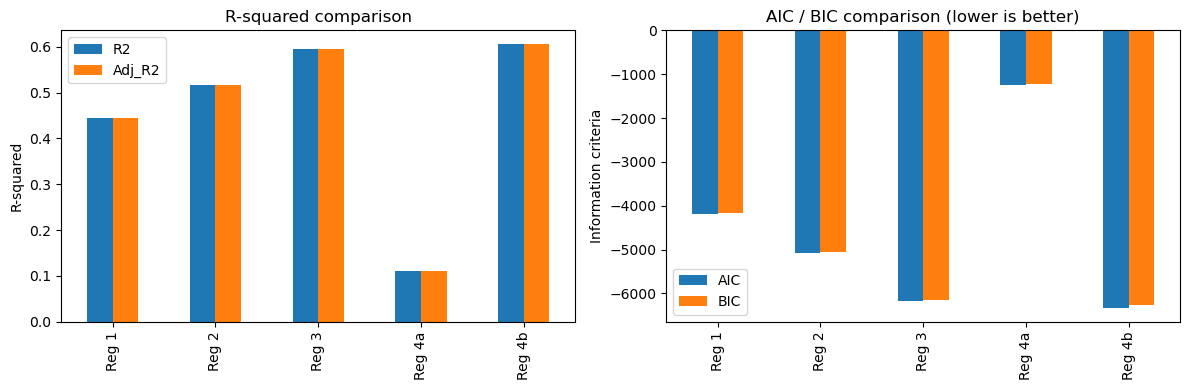

area_id
    model          coef     tvalue         pvalue significant
1   Reg 2  2.236804e-08  30.947461  8.489372e-196        True
2   Reg 3  6.812609e-09   7.627702   2.746281e-14        True
4  Reg 4b  5.551737e-09   6.138867   8.821046e-10        True


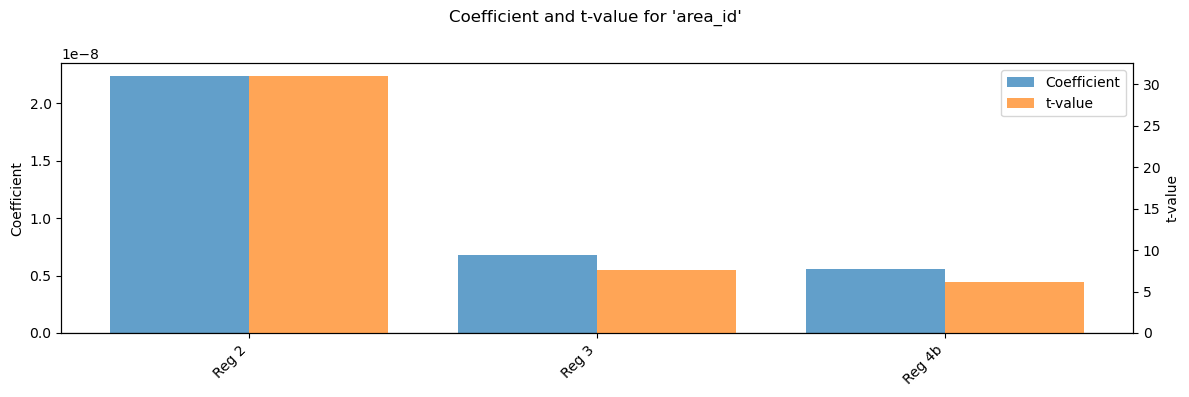

d_cbd
   model      coef     tvalue        pvalue significant
0  Reg 1  0.037764  70.657897  0.000000e+00        True
1  Reg 2  0.031330  58.077243  0.000000e+00        True
2  Reg 3  0.010185   7.050008  1.981469e-12        True


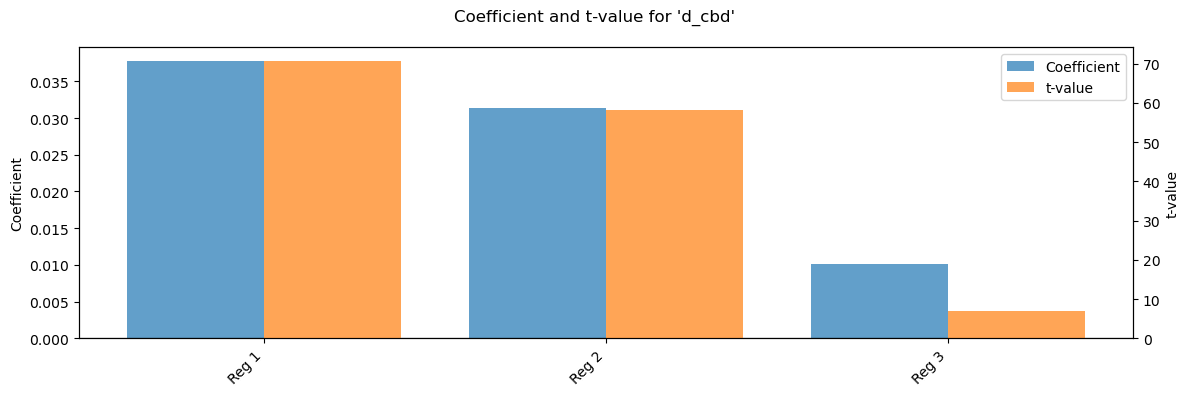

d_outb
    model      coef     tvalue         pvalue significant
2   Reg 3 -0.047075 -31.241213  3.117263e-199        True
4  Reg 4b -0.057685 -55.467850   0.000000e+00        True


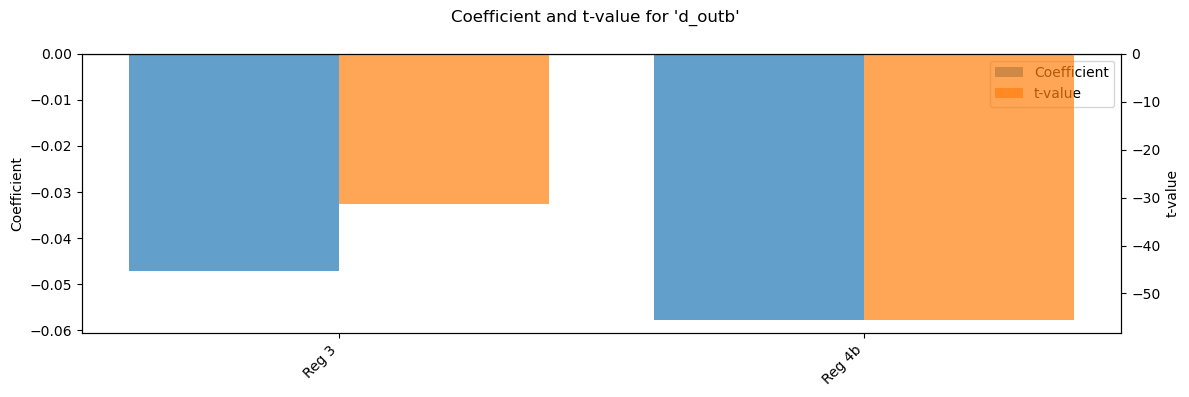

d_wall
    model      coef    tvalue        pvalue significant
2   Reg 3 -0.008678 -9.813244  1.435961e-22        True
4  Reg 4b -0.004501 -2.924555  3.461890e-03        True


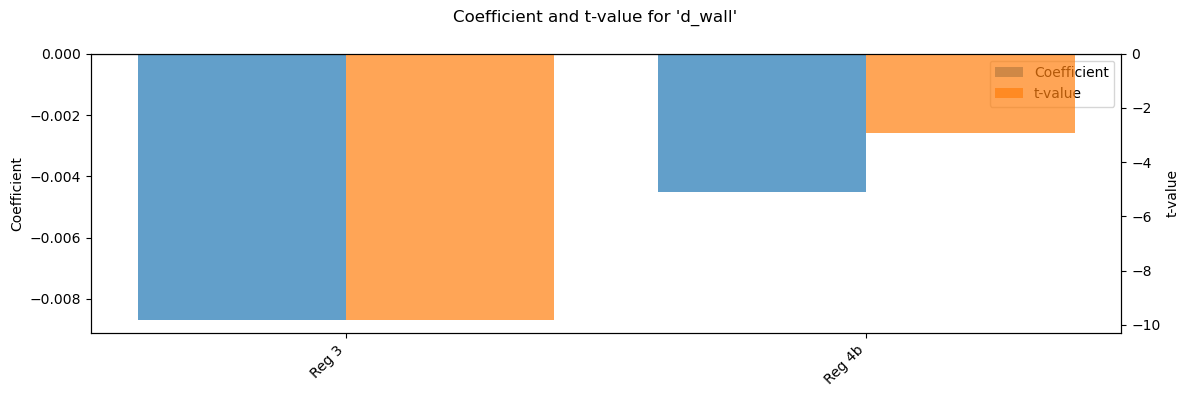

dcell[T.Far]
    model      coef     tvalue         pvalue significant
3  Reg 4a  0.197146  22.530864  3.780617e-108        True
4  Reg 4b  0.043492   3.614890   3.028402e-04        True


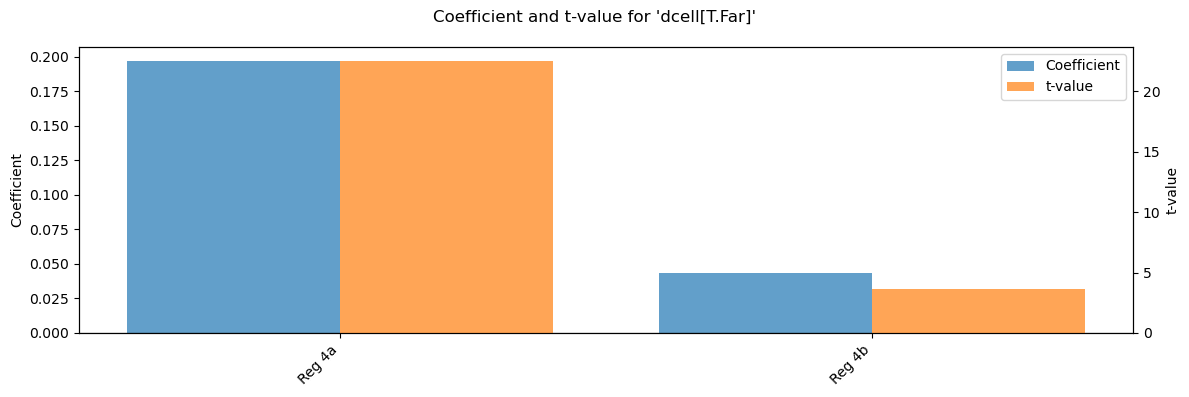

dcell[T.Farthest]
    model      coef     tvalue         pvalue significant
3  Reg 4a  0.201197  22.993851  2.201397e-112        True
4  Reg 4b -0.003912  -0.211493   8.325099e-01       False


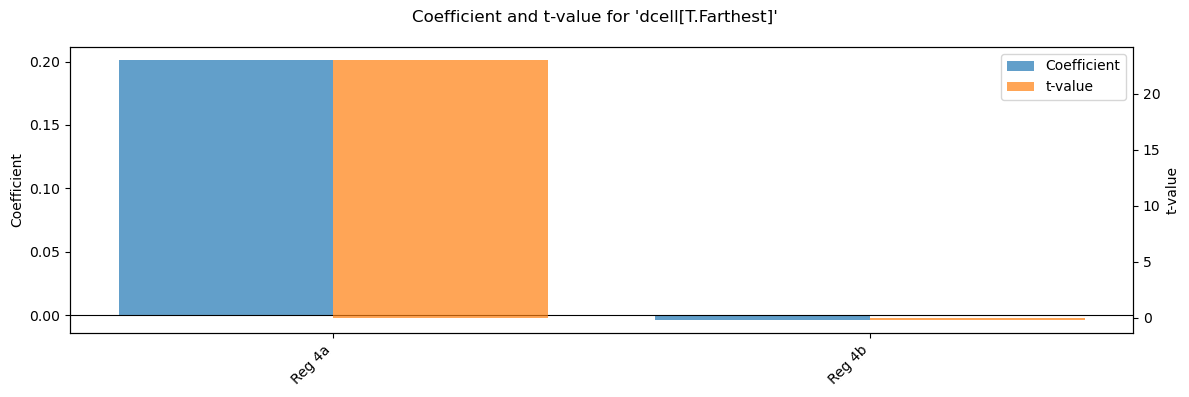

dcell[T.Mid]
    model      coef     tvalue        pvalue significant
3  Reg 4a  0.132635  15.158188  5.342406e-51        True
4  Reg 4b  0.068078   7.607333  3.211097e-14        True


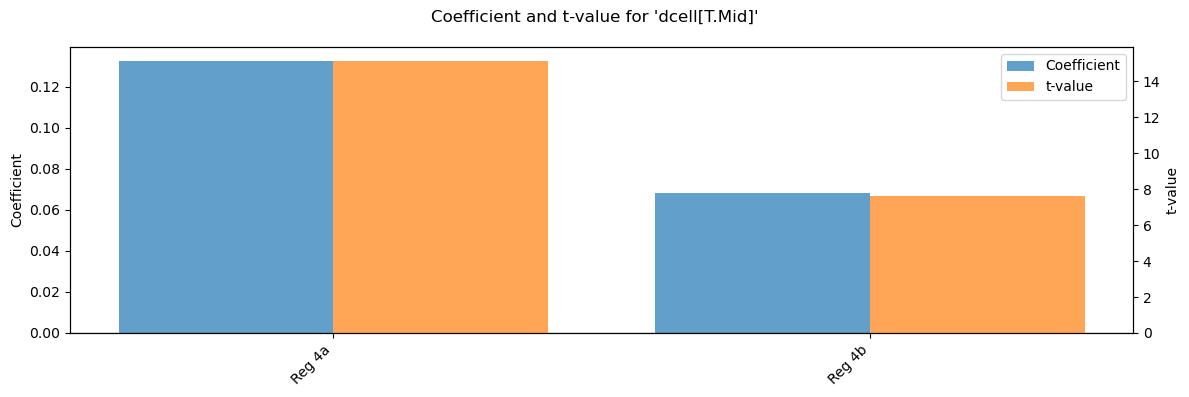

dcell[T.Near]
    model      coef    tvalue        pvalue significant
3  Reg 4a  0.066602  7.611564  3.108419e-14        True
4  Reg 4b  0.044941  6.587873  4.825596e-11        True


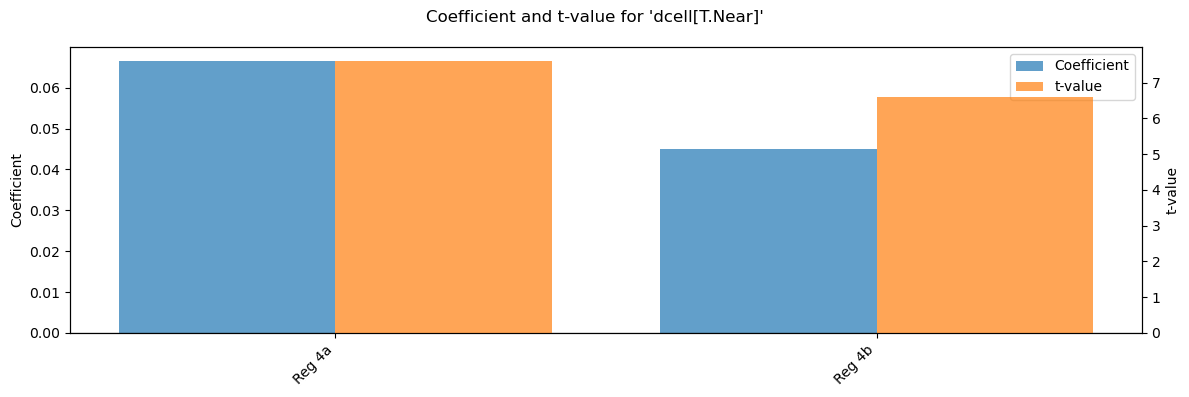

In [7]:
# Example usage with your existing models:
diagnostics_dict = compare_ols_models(
    models=[smf_1, smf_2, smf_3, smf_4a, smf_4b],
    # model_names=["d_cbd",  "d_cbd+area_id", "d_cbd+d_wall+d_outb+area_id", "dcell", "dcell + area_id + d_wall + d_outb"],
    model_names=["Reg 1", "Reg 2", "Reg 3", "Reg 4a", "Reg 4b"],
    comparison_type='both',
    plot=True,
)
results_diagnostics_df = diagnostics_dict['results'].copy()
coefs_table_df = diagnostics_dict['coefs'].copy()

In [8]:
results_diagnostics_df

,nobs,R2,Adj_R2,AIC,BIC,RMSE
model,,,,,,
Reg 1,6260,0.443760,0.443671,-4188.016522,-4174.532651,0.173149
Reg 2,6260,0.517600,0.517446,-5077.603626,-5057.377820,0.161260
Reg 3,6260,0.595562,0.595304,-6177.093183,-6143.383505,0.147679
Reg 4a,6260,0.111187,0.110618,-1248.034286,-1214.324609,0.218926
Reg 4b,6260,0.605597,0.605156,-6328.378032,-6274.442548,0.145870


In [9]:
coefs_table_df.dropna(axis=0)

coef     tvalue         pvalue significant
model  term                                                                 
Reg 1  d_cbd              3.776410e-02  70.657897   0.000000e+00        True
Reg 2  area_id            2.236804e-08  30.947461  8.489372e-196        True
       d_cbd              3.132953e-02  58.077243   0.000000e+00        True
Reg 3  area_id            6.812609e-09   7.627702   2.746281e-14        True
       d_cbd              1.018549e-02   7.050008   1.981469e-12        True
       d_outb            -4.707493e-02 -31.241213  3.117263e-199        True
       d_wall            -8.677680e-03  -9.813244   1.435961e-22        True
Reg 4a dcell[T.Far]       1.971461e-01  22.530864  3.780617e-108        True
       dcell[T.Farthest]  2.011973e-01  22.993851  2.201397e-112        True
       dcell[T.Mid]       1.326349e-01  15.158188   5.342406e-51        True
       dcell[T.Near]      6.660154e-02   7.611564   3.108419e-14        True
Reg 4b area_id            5.551737e-09   6.138867   8.821046e-10        True
       d_outb            -5.768508e-02 -55.467850   0.000000e+00        True
       d_wall            -4.500569e-03  -2.924555   3.461890e-03        True
       dcell[T.Far]       4.349238e-02   3.614890   3.028402e-04        True
       dcell[T.Farthest] -3.912483e-03  -0.211493   8.325099e-01       False
       dcell[T.Mid]       6.807799e-02   7.607333   3.211097e-14        True
       dcell[T.Near]      4.494052e-02   6.587873   4.825596e-11        True